CNN신경망

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

# 추가적인 모듈
import torchvision.datasets as dset # vision 데이터를 읽어오는 역할
import torchvision.transforms as transforms # 이미지를 필요에 따라 변환해주는 역할을 하는 모듈
from torch.utils.data import DataLoader # Data의 batch size 설정 및 random하게 섞기 등을 해주는 모듈

In [27]:
# 하이퍼 파라미터
batch_size = 256 * 2
learning_rate = 0.0002
num_epoch = 10

In [19]:
# dset.MNIST("./", train=True(train, test 데이터 중에 무얼 가져올지, transform=transforms.ToTensor(), target_transform=None -> 각각 데이터와 라벨의 변형에 관련, download=True)
mnist_train = dset.MNIST("./", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("./", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

# DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=2(데이터를 묶을 때 사용할 프로세스 개수), drop_last=True(묶고 남는 데이터를 버릴지 말지))
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

In [20]:
class CNN(nn.Module):
    def __init__(self) -> None:
        super().__init__() # CNN class의 부모클래스인 nn.Module을 초기화하는 역할
        self.layer = nn.Sequential(
            nn.Conv2d(1, 16, 5), # (input channels, output channels, kernel size) -> 1dim(gray img)의 28X28 이미지가 batch size 개수만큼 들어오고, 16개의 5X5 kernel을 거쳐 24X24X16 차원의 layer가 됨
            nn.ReLU(),
            nn.Conv2d(16, 32, 5), # -> [20 X 20 X 32] 크기의 layer
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # -> [10 X 10 X 32] 크기의 layer
            nn.Conv2d(32, 64, 5), # -> [6 X 6 X 64] 크기의 layer
            nn.ReLU(),
            nn.MaxPool2d(2, 2) # -> [3 X 3 X 64] 크기의 layer
        )
        self.fc_layer = nn.Sequential(
            nn.Linear(64 * 3 * 3, 100),
            nn.ReLU(),
            nn.Linear(100, 10)
        )
    
    def forward(self, x):
        out = self.layer(x)
        out = out.reshape(batch_size, -1) # batch_size개수의 차원에, -1은 -1인 부분의 차원을 알아서 적당히 하라는 뜻. 즉, 이렇게 하면 각 이미지를 1차원으로 flatten한 것과 같은 결과를 가짐
        out = self.fc_layer(out)
        return out


In [24]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [28]:
loss_array = []
for i in range(num_epoch):
    for j, [img, label] in enumerate(train_loader):
        x = img.to(device)
        y_ = label.to(device)

        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_func(output, y_)
        loss.backward()
        optimizer.step()

        if j % 10 == 0:
            print(loss)
            loss_array.append(loss.cpu().detach().numpy())

tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.5200e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(9.9753e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(9.6144e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:

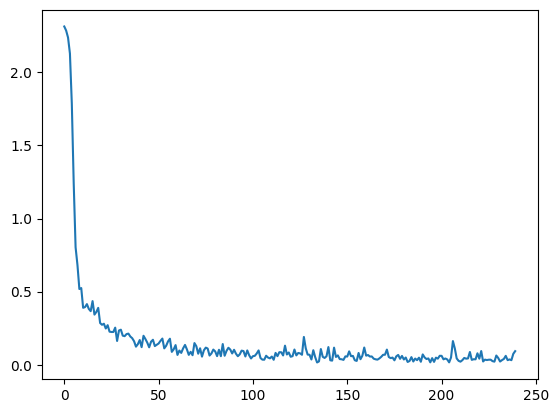

In [16]:
import matplotlib.pyplot as plt
plt.plot(loss_array)
plt.show()
1 3 5 7 9 11 13 15 17 19 21 23 25 27 29 31 1/2

In [31]:
correct = 0
total = 0

with torch.no_grad():
    for img, label in test_loader:
        x = img.to(device)
        y_ = label.to(device)

        output = model.forward(x)
        _, output_index = torch.max(output, 1)

        total += label.size(0)
        correct += (output_index == y_).sum().float()

    print("Accuracy of Test Data: {}".format(100*correct/total))

Accuracy of Test Data: 99.05427551269531
